<a href="https://colab.research.google.com/github/tvaditya/NeuroComp-INPE/blob/master/BreastCancerMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
!pip install tensorflow-gpu==2.0.0.alpha0

In [0]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
ds = datasets.load_breast_cancer()
X = ds.data
y = ds.target

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state=76)

In [71]:
print(X_train.shape)
print(X_test.shape)

(398, 30)
(171, 30)


In [72]:
print(y.mean())
print(y_train.mean())

0.6274165202108963
0.628140703517588


In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=16, activation='relu', input_shape=(30, )))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units=16, activation ='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.3)

Train on 278 samples, validate on 120 samples
Epoch 1/100
278/278 [==============================] - 0s 1ms/sample - loss: 19.8456 - accuracy: 0.5000 - val_loss: 2.1120 - val_accuracy: 0.6500
Epoch 2/100
278/278 [==============================] - 0s 70us/sample - loss: 17.7678 - accuracy: 0.5863 - val_loss: 2.8632 - val_accuracy: 0.7417
Epoch 3/100
278/278 [==============================] - 0s 68us/sample - loss: 17.1181 - accuracy: 0.6223 - val_loss: 3.5081 - val_accuracy: 0.7667
Epoch 4/100
278/278 [==============================] - 0s 69us/sample - loss: 9.4272 - accuracy: 0.6583 - val_loss: 4.7383 - val_accuracy: 0.7583
Epoch 5/100
278/278 [==============================] - 0s 57us/sample - loss: 8.9633 - accuracy: 0.7050 - val_loss: 3.8603 - val_accuracy: 0.8000
Epoch 6/100
278/278 [==============================] - 0s 77us/sample - loss: 11.9084 - accuracy: 0.7050 - val_loss: 2.9952 - val_accuracy: 0.8083
Epoch 7/100
278/278 [==============================] - 0s 72us/sample - los

In [76]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

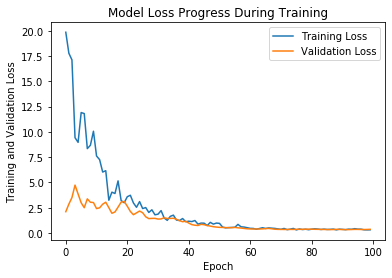

In [77]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

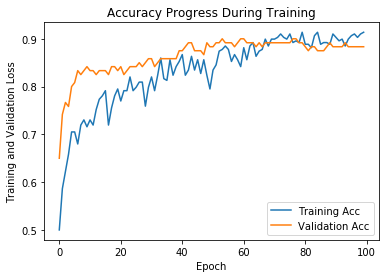

In [78]:
plt.plot(epochs_hist.history['accuracy'])
plt.plot(epochs_hist.history['val_accuracy'])
plt.title('Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Acc', 'Validation Acc'])

In [79]:
scores = model.evaluate(X_test, y_test )

171/171 [==============================] - 0s 64us/sample - loss: 0.2517 - accuracy: 0.9298


In [80]:

print("\n%s: %.2f%%" % (model.metrics_names, scores[1]*100))


['loss', 'accuracy']: 92.98%


In [0]:
predictions = model.predict(X_test)


In [0]:
y_pred = (predictions > 0.5)

In [83]:
confusion_matrix(y_test, y_pred)

array([[ 54,  10],
       [  2, 105]])